In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = "/content/drive/MyDrive/Projects/NNN/Leads-data.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,duration,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [5]:
df.shape

(46608, 15)

In [6]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'duration',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [7]:
drop_cols = ['Unnamed: 0','Agent_id','lead_id']
df = df.drop(drop_cols,axis=1)

In [8]:
df_won = df[df['status'] == 'WON']
df_lost = df[df['status'] == 'LOST']

In [9]:
df_wl = pd.concat([df_won,df_lost])
df_wl.head()

,status,lost_reason,budget,duration,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type
98,WON,NaN,109,51,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,acb208d3ac02ab6d5a45120b4187f12bc41a132011fe1c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
111,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,71b89d8b802ddcc0120ec5352d9c0fe5bde35a3aff101b...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio
139,WON,NaN,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,acb208d3ac02ab6d5a45120b4187f12bc41a132011fe1c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place
141,WON,NaN,> 300£ Per Week,Complete Education Year Stay 50 - 52 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
152,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,69f0114003f8a8ec5f99506325f8ca6a5ca237c9fe91ba...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place


In [10]:
df = df_wl.copy()
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head()

,status,lost_reason,budget,duration,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type
0,LOST,Not responding,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
1,LOST,Not interested,£121 - £180 Per Week,Complete Education Year Stay 50 - 52 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
2,WON,NaN,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,9ac56ef275bb33f0f931abd846e53e845a80af8a549100...,82244417f956ac7c599f191593f7e441a4fafa20a4158f...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
3,LOST,Not responding,0-0,full-course-stay,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,d30f10c54d1183500120484bb1ebd2f2e0a01cf6889ff2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c648...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
4,LOST,Junk lead,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,24420b62ffb824d4a51e98b68fbda4e94198c09307fb78...,c2863266ba318106a050f6f52c0a0e5ee19bdbacc19c09...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio


In [12]:
df.columns

Index(['status', 'lost_reason', 'budget', 'duration', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country',
       'room_type'],
      dtype='object')

In [13]:
df.isna().sum()

status                0
lost_reason        3073
budget             3694
duration           2336
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23491
dtype: int64

In [14]:
print(df['lost_reason'].unique())

['Not responding' 'Not interested' nan 'Junk lead' 'Just Enquiring'
 'Low availability' 'Wants private accommodation'
 'Not serving in that region' 'Not a student' 'Low budget'
 'Inadequate details' 'Booked with competitor'
 'Booked on campus accommodation' 'Short stay' 'Not going to university'
 'Semester stay' 'Lead issue' 'Repeat lead' 'No supply'
 'Booked with manager' 'Distance issue' 'Supply issue'
 'Looking for admission' 'Junk lead/ Just Enquiring'
 "Didn't respond in time" 'Looking for Scholarship'
 'Visa/admission denied' 'Looking for loan' 'Guarantor issue'
 'Underage student' 'Cross sell']


In [15]:
lost_reason = {
    'admission' : ['Cross sell','Looking for loan','Looking for Scholarship','Guarantor issue','Underage student','Visa/admission denied','Looking for admission', 'Not a student'],
    'no_response' : ['Not responding', "Didn't respond in time"],
    'junk' : ['Junk lead', 'Inadequate details', 'Just Enquiring', 'Junk lead/ Just Enquiring', 'Lead issue', 'Repeat lead'],
    'supply' : ['No supply', 'Supply issue'],
    'booked_na' : ['Booked with manager', 'Booked with competitor', 'Booked on campus accommodation', 'Low availability'],
    'location' : ['Distance issue', 'Not serving in that region'],
    'stay_accomodation' : ['Wants private accommodation', 'Short stay', 'Semester stay'],
    'budget' : ['Low budget'],
    'not_interested' : ['Not interested', 'Not going to university']
}

In [16]:
def get_reason(x):
  for key,vals in lost_reason.items():
    if x in vals:
      return key
  return 'not mentioned'

In [17]:
code_cols = ['source','source_country','source_city','utm_source','utm_medium','des_city','des_country']
code_cols_dict = {}
for col in code_cols:
  code_cols_list = []
  i = 0
  for a,b in df[col].value_counts().items():
    code_cols_list.append(a)
    i+=1
    if i > 8:
      break
  code_cols_dict[col] = code_cols_list

In [18]:
code_cols_dict

{'source': ['7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
  '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',
  '7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916',
  'ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b',
  '146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549',
  'd684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64',
  '9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af',
  '9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54',
  'b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831'],
 'source_country': ['e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96',
  '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',
  '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2',
  'e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f',
  '38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451

In [19]:
def get_col(x,col,col_dict):
  if x in col_dict[col]:
    return x
  return "not mentioned"

In [20]:
for col in code_cols:
  df[col] = df[col].apply(lambda x : get_col(x,col,code_cols_dict))

In [21]:
# for col in code_cols:
#   print(col)
#   print(df[col].value_counts())
#   print('='*100)

In [22]:
df['lost_reason'] = df['lost_reason'].apply(lambda x : get_reason(x))

In [23]:
df['lost_reason'].value_counts()

booked_na            10537
no_response           7862
not_interested        6778
stay_accomodation     5862
budget                5505
junk                  3387
not mentioned         3073
admission             1611
supply                1072
location               630
Name: lost_reason, dtype: int64

In [24]:
df.columns

Index(['status', 'lost_reason', 'budget', 'duration', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country',
       'room_type'],
      dtype='object')

In [25]:
df['room_type'].value_counts()

Ensuite         12379
Studio           6316
Entire Place     4128
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [26]:
rooms = ['Ensuite','Studio','Entire Place']
def get_room_type(x):
  if x in rooms:
    return x
  return "not mentioned"

In [27]:
df['room_type'] = df['room_type'].apply(lambda x : get_room_type(x))
df['room_type'].value_counts()

not mentioned    23494
Ensuite          12379
Studio            6316
Entire Place      4128
Name: room_type, dtype: int64

In [28]:
df.columns

Index(['status', 'lost_reason', 'budget', 'duration', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country',
       'room_type'],
      dtype='object')

In [29]:
import re
def get_nums(x,month):
  numbers = re.findall(r'[0-9]+', x)
  for i in range(len(numbers)):
      numbers[i] = int(numbers[i])
  if month:
    for i in range(len(numbers)):
      numbers[i] = 4 * numbers[i]
  return numbers

In [30]:
weeks = ['pw','ppw','week','weeks','weekly']
months = ['pm','ppm','month','months','monthly','pcm']
def get_month(x):
  for word in x:
      if word in months:
        return True
  return False

In [31]:
def get_budget(x):
  x = str(x).lower()
  x = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x)
  alphabets = re.findall(r'[a-zA-Z]+', x)
  month = get_month(alphabets)
  nums = get_nums(x,month)
  # print(alphabets,nums,month)
  if len(nums) == 0:
    return [-1,-1]
  elif len(nums) == 1:
    return [nums[0],nums[0]]
  elif len(nums) == 2:
    return [nums[0],nums[1]]
  elif len(nums) == 3 or len(nums) == 4:
    return [nums[1],nums[2]]

In [32]:
get_budget("500 pcm")

[2000, 2000]

In [33]:
df['budget'] = df['budget'].fillna("not_mentioned")

In [34]:
mins = []
maxs = []
for x in df['budget']:
  got = get_budget(x)
  if got[0] > 10000 or got[1] > 10000:
    got = [-1,-1]
  mins.append(got[0])
  maxs.append(got[1])

In [35]:
df['min_budget'] = mins
df['max_budget'] = maxs

In [36]:
# df[['budget','min_budget','max_budget']].head(20)

In [37]:
# df[df['duration'] == '2']

In [38]:
years = ['year','years']
months = ['month','months','mnth']
week = ['weeks','week']
days = ['day','days']
sem = ["sem","course"]
def getnum(n):
  a = 0;
  for x in n:
    a += int(x)
  return a // len(n)

def get_duration(x):
  x = x.lower()
  alphabets = re.findall(r'[a-zA-Z]+', x)
  numbers = re.findall(r'[0-9]+', x)
  if len(alphabets) == 0:
    if len(numbers) == 1:
      if(numbers[0] == '1'):
        return 52
      elif len(numbers[0]) == 1:
        return 4 * int(numbers[0])
      elif len(numbers[0]) == 2:
        return int(numbers[0])
      elif len(numbers[0]) == 3:
        return int(numbers[0]) // 7
      return getnum(numbers)
      

  elif len(numbers) > 0 and len(alphabets) > 0:
    for a in alphabets:
      a = a.lower()
      if a in days:
        return getnum(numbers) // 7
      elif a in weeks:
        return getnum(numbers)
      elif a in months:
        return 4 * getnum(numbers)
      elif a in years:
        return 52 * getnum(numbers)
      return getnum(numbers)

  else:
    for a in alphabets:
      a = a.lower()
      if "sem" in a or "course" in a:
        return 24
      elif a in months:
        return 4 
      elif a in years:
        return 52
  return -1


In [39]:
# for a,b in df['duration'].value_counts().items():
#   print(a , "==> ",get_duration(a))

In [40]:
df['duration'].fillna("not mentioned",inplace=True)

In [41]:
dur_list = df['duration'].apply(lambda x : get_duration(x))
dur_list = [-1 if x >10000 else x for x in dur_list]

In [42]:
dict_weeks = {"weeks":dur_list}

In [43]:
dur_df = pd.DataFrame(dict_weeks)
dur_df.describe()

,weeks
count,46317.000000
mean,28.786925
std,23.418752
min,-1.000000
25%,0.000000
50%,42.000000
75%,51.000000
max,2023.000000


<ipython-input-44-927b1cef6311>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dur_df['weeks'])


<Axes: xlabel='weeks', ylabel='Density'>

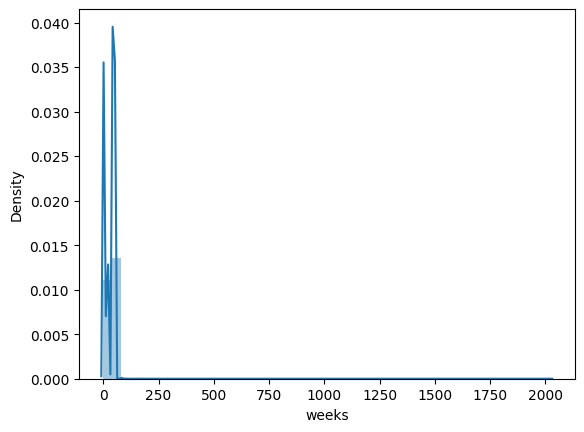

In [44]:
sns.distplot(dur_df['weeks'])

In [45]:
df['duration'] = dur_list

In [46]:
df.head(20)

,status,lost_reason,budget,duration,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,min_budget,max_budget
0,LOST,no_response,not_mentioned,-1,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,not mentioned,-1,-1
1,LOST,not_interested,£121 - £180 Per Week,51,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,121,180
2,WON,not mentioned,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,9ac56ef275bb33f0f931abd846e53e845a80af8a549100...,82244417f956ac7c599f191593f7e441a4fafa20a4158f...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,not mentioned,0,0
3,LOST,no_response,0-0,24,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,not mentioned,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,not mentioned,0,0
4,LOST,junk,£181 - £240 Per Week,42,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,not mentioned,c2863266ba318106a050f6f52c0a0e5ee19bdbacc19c09...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,181,240
5,LOST,not_interested,£121 - £180 Per Week,42,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,121,180
6,LOST,no_response,£60 - £120 Per week,42,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,not mentioned,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,60,120
7,WON,not mentioned,£121 - £180 Per Week,51,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,121,180
8,LOST,junk,150,51,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d3...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,not mentioned,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,not mentioned,150,150
9,LOST,booked_na,£181 - £240 Per Week,42,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,181,240


In [47]:
drop_cols = ['budget']
df = df.drop(drop_cols,axis=1)

In [48]:
status_map = {
    'WON' : 1,
    "LOST" : 0
}
df['status'] = df['status'].map(status_map)

In [49]:
df.head()

,status,lost_reason,duration,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,min_budget,max_budget
0,0,no_response,-1,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,not mentioned,-1,-1
1,0,not_interested,51,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,121,180
2,1,not mentioned,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,9ac56ef275bb33f0f931abd846e53e845a80af8a549100...,82244417f956ac7c599f191593f7e441a4fafa20a4158f...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,not mentioned,0,0
3,0,no_response,24,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,not mentioned,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,not mentioned,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,not mentioned,0,0
4,0,junk,42,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,not mentioned,c2863266ba318106a050f6f52c0a0e5ee19bdbacc19c09...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,181,240


In [50]:
X = df.drop('status',axis=1)
y = df['status']

In [51]:
X.columns

Index(['lost_reason', 'duration', 'source', 'source_city', 'source_country',
       'utm_source', 'utm_medium', 'des_city', 'des_country', 'room_type',
       'min_budget', 'max_budget'],
      dtype='object')

In [52]:
cat_cols = ['lost_reason', 'source', 'source_city', 'source_country','utm_source', 'utm_medium', 'des_city', 'des_country', 'room_type']

In [53]:
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in cat_cols:
  le = LabelEncoder()
  encoded = le.fit_transform(X[col])
  X[col] = encoded
  le_dict[col] = le

In [54]:
X

,lost_reason,duration,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,min_budget,max_budget
0,5,-1,3,5,3,1,3,8,5,3,-1,-1
1,7,51,1,9,6,6,1,0,5,0,121,180
2,6,0,7,9,6,5,6,3,5,3,0,0
3,5,24,2,9,6,6,1,9,5,3,0,0
4,3,42,1,9,5,6,1,3,5,2,181,240
...,...,...,...,...,...,...,...,...,...,...,...,...
46312,3,51,1,9,1,6,1,8,5,0,60,120
46313,8,0,7,3,2,6,1,9,5,3,0,0
46314,1,51,9,9,2,6,1,8,5,3,200,200
46315,1,42,1,9,6,6,1,8,5,0,121,180


<Axes: >

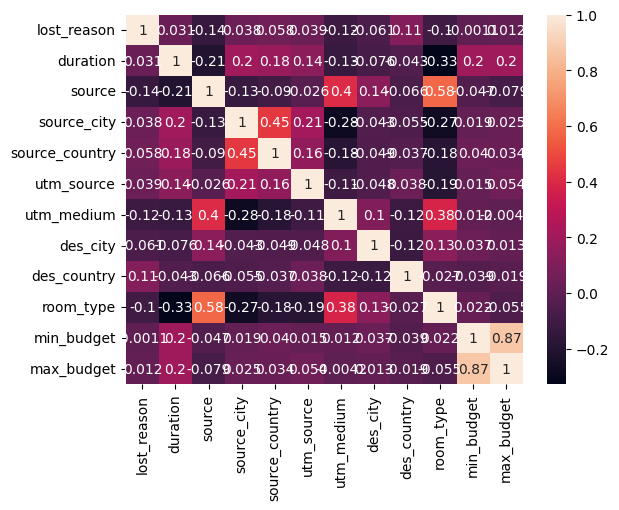

In [55]:
sns.heatmap(X.corr(),annot=True)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
lr.score(X_test,y_test)

0.9335296041871115

In [60]:
from sklearn.tree import DecisionTreeClassifier
dr = DecisionTreeClassifier()
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

1.0

In [61]:
# check_df = pd.read_csv(data_path)
# for a,b in check_df['budget'].value_counts().items():
#   print(a," ===> ",get_budget(a))

In [62]:
from sklearn.metrics import precision_recall_fscore_support

In [63]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def compute_metrics(y_true,y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  recall = recall_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred)
  f1 = f1_score(y_true,y_pred)
  return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [64]:
y_pred_dr = dr.predict(X_test)
precision_recall_fscore_support(y_test,y_pred_dr,average='weighted')

(1.0, 1.0, 1.0, None)

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
precision_recall_fscore_support(y_test,y_pred_rfc,average='weighted')

(1.0, 1.0, 1.0, None)

In [66]:
compute_metrics(y_test,y_pred_rfc)

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

In [67]:
import pickle
pickle.dump(rfc,open('final_model.sav','wb'))

In [68]:
preds_prob = rfc.predict_proba(X_test)

In [69]:
revmap = {
    1 : 'WON',
    0 : 'LOST'
}

<Axes: >

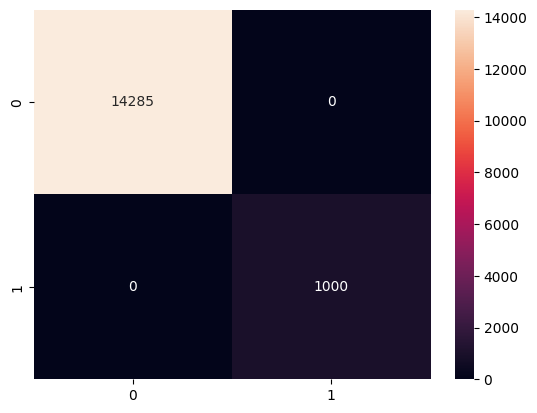

In [76]:
preds = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='g')